<a href="https://colab.research.google.com/github/Si-kaR/LINN-ODAC/blob/main/L_I_N_N_ODAC_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lite Intelligent Neural Network L.I.N.N Model |-| Development Workstation

**Capstone Project – Applied Research**  
**Program:** Computer Science (CS)  
**Class Year Group:** 2025  
**Author:** *Robert Sika*  

---

<!-- This notebook contains code based on research and development work conducted as part of my (Robert) Capstone project.  -->
<!-- All concepts, model development, experimentation, and analysis herein are the intellectual property of **Robert Sika**, submitted in fulfillment of academic requirements at Ashesi University. -->

<!-- Unauthorized use, reproduction, or distribution without explicit permission from the author is prohibited. -->


### Cell 1 - Mounting Drive - Extracting Dataset

In [ ]:
# Code update - April 13th

print("Mounting Google Drive . . .")
# mounting drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounting Google Drive . . .
Mounted at /content/drive


In [ ]:
print("Unzipping dataset . . .")
!unzip "/content/drive/My Drive/Colab Notebooks/CAPSTONE/dataset.zip" -d "/content"

Unzipping dataset . . .
Archive:  /content/drive/My Drive/Colab Notebooks/CAPSTONE/dataset.zip
   creating: /content/dataset/
   creating: /content/dataset/cardboard/
  inflating: /content/dataset/cardboard/cardboard1.jpg  
  inflating: /content/dataset/cardboard/cardboard10.jpg  
  inflating: /content/dataset/cardboard/cardboard100.jpg  
  inflating: /content/dataset/cardboard/cardboard101.jpg  
  inflating: /content/dataset/cardboard/cardboard102.jpg  
  inflating: /content/dataset/cardboard/cardboard103.jpg  
  inflating: /content/dataset/cardboard/cardboard104.jpg  
  inflating: /content/dataset/cardboard/cardboard105.jpg  
  inflating: /content/dataset/cardboard/cardboard106.jpg  
  inflating: /content/dataset/cardboard/cardboard107.jpg  
  inflating: /content/dataset/cardboard/cardboard108.jpg  
  inflating: /content/dataset/cardboard/cardboard109.jpg  
  inflating: /content/dataset/cardboard/cardboard11.jpg  
  inflating: /content/dataset/cardboard/cardboard110.jpg  
  inflating

### Confirming existence of files

In [ ]:
import os
dataset_path = "/content/dataset"
print("Classes in dataset:", os.listdir(dataset_path))


Classes in dataset: ['plastic', 'trash', 'paper', 'glass', 'cardboard', 'metal']


### Cell 2 - Splitting Data into Train, Test and Val




In [ ]:
# Splitting data into train, test and val
import os
import shutil
import random

print("Defining dataset paths . . .")
# Defining dataset paths
original_dataset = "/content/dataset"
split_dataset = "/content/dataset_split"

print("Defining split ratios . . .")
# Defining split ratios
# ================= Updated - April 13th  =================
train_ratio = 0.7 #Increasing training data
val_ratio = 0.15 #Increasing validation data
test_ratio = 0.15 #Increasing testing data
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1


print("Creating directories for train, val, and test. . . ")
# Creating train, val, and test directories
for split in ['train', 'val', 'test']:
    for category in os.listdir(original_dataset):
        os.makedirs(os.path.join(split_dataset, split, category), exist_ok=True)

print("Splitting dataset. . . ")
# Splitting data
for category in os.listdir(original_dataset):
    files = os.listdir(os.path.join(original_dataset, category))
    random.shuffle(files)

    train_split = int(len(files) * train_ratio)
    val_split = int(len(files) * (train_ratio + val_ratio))

    train_files = files[:train_split]
    val_files = files[train_split:val_split]
    test_files = files[val_split:]

    for file in train_files:
        shutil.move(os.path.join(original_dataset, category, file), os.path.join(split_dataset, 'train', category, file))

    for file in val_files:
        shutil.move(os.path.join(original_dataset, category, file), os.path.join(split_dataset, 'val', category, file))

    for file in test_files:
        shutil.move(os.path.join(original_dataset, category, file), os.path.join(split_dataset, 'test', category, file))

print("\n✅ Dataset successfully split!")


Defining dataset paths . . .
Defining split ratios . . .
Creating directories for train, val, and test. . . 
Splitting dataset. . . 

✅ Dataset successfully split!


### Cell 3 - Enhanced Loading and Augmentation

In [ ]:
# Loading data into tensorflow to prepare the data for training, validation, and testing.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the new dataset structure
train_dir = "/content/dataset_split/train"
val_dir = "/content/dataset_split/val"
test_dir = "/content/dataset_split/test"

# Updated April 13th
print("Performing data augmentation . . .")
# Enhanced data augmentation
# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation
    zoom_range=0.3,     # More zoom variation
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2, # Vertical shifts
    horizontal_flip=True,
    vertical_flip=True,     # Added vertical flip
    brightness_range=[0.7, 1.3],  # Brightness variation
    shear_range=0.2,   # Shear transformations
    fill_mode='nearest'
)

# Updated April 13th
# Simple normalization for validation and test data
print("Performing normalization . . .")
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Updated April 13th
print("Setting image size . . .")
# Setting image size
img_size = 224

# Updated April 13th

# # Load images from directories
# train_data = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
# val_data = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
# test_data = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

# print("✅ Data successfully loaded!")

# Updated April 13th
print("Loading images from directories  . . . ")
# Load images from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
) #Print number of images found

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
) #Print number of images found

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keeping the order for evaluation
) #Print number of images found

print("\n✅ Data successfully loaded!")
print(f"Number of training samples: {train_data.samples}")
print(f"Number of validation samples: {val_data.samples}")
print(f"Number of test samples: {test_data.samples}")
print(f"\nClass indices: {train_data.class_indices}")

Performing data augmentation . . .
Performing normalization . . .
Setting image size . . .
Loading images from directories  . . . 
Found 1766 images belonging to 6 classes.
Found 378 images belonging to 6 classes.
Found 383 images belonging to 6 classes.

✅ Data successfully loaded!
Number of training samples: 1766
Number of validation samples: 378
Number of test samples: 383

Class indices: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


### Cell 4 - Improved Model Architecture with Transfer learning



In [ ]:
# Updated April 13th
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D

print("Defining image dimensions . . . ")
# Defining image dimensions
img_size = 224
input_shape = (img_size, img_size, 3)

print("Defining number of classes in dataset . . . ")
# Number of classes in dataset
num_classes = len(train_data.class_indices)

print("Creating MobileNetV2 base model  for edge deployment . . . ")
# Creating base model - using MobileNetV2 for edge deployment
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

print("Freezing base model layers initially . . . ")
# Freezing base model layers initially
for layer in base_model.layers:
    layer.trainable = False

print("Creating L.I.N.N - (LiteIntelligentNeuralNetwork) model  . . . ")
# Creating L.I.N.N - (LiteIntelligentNeuralNetwork) model
model = Sequential([
    # Base model
    base_model,

    # Top layers
    GlobalAveragePooling2D(),
    BatchNormalization(),

    # First dense block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
activation function
    # Second dense block
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    # Single-Label Classification
    Dense(num_classes, activation='softmax')
    # "Softmax" : assigns probabilities to each class and selects the class with the highest probability as the prediction.
    # This approach assumes that the input image contains only one dominant object or material.


    # To be in version2 ###############################################################################################################

    # Output layer
    # Multi-Label Classification
    Dense(num_classes, activation='sigmoid')
    # "Sigmoid" : allows the model to assign independent probabilities to each class, enabling it to predict multiple classes for a single image.

    '''  STEPS FOR MULTI-LABEL CLASSIFICATION
    # Prepare Multi-Label Data    : Ensure your dataset is annotated for multi-label classification. Each image should have a binary vector indicating the presence or absence of each class.

    # Object Detection Model      : If you want to detect and classify multiple objects in an image (e.g., identifying specific regions where materials are located), you need an object detection model like YOLO (You Only Look Once), SSD (Single Shot Detector), or Faster R-CNN.

    # Post-Processing             : For object detection, you would need to process the model's output to extract bounding boxes, class labels, and confidence scores for each detected object.

    # Model Training              : Train the model on a dataset that contains images with multiple objects and their corresponding bounding boxes and labels. '''

    # To be in version2 ###############################################################################################################


    ])

print("Model Summary . . . ")
# Model summary
model.summary()

Defining image dimensions . . . 
Defining number of classes in dataset . . . 
Creating MobileNetV2 base model  for edge deployment . . . 
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Freezing base model layers initially . . . 
Creating L.I.N.N - (LiteIntelligentNeuralNetwork) model  . . . 
Model Summary . . . 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,626,246 (10.02 MB)

 Trainable params: 364,934 (1.39 MB)

 Non-trainable params: 2,261,312 (8.63 MB)

### Cell 5 - Enhanced Compilation with Learning Rate Strategy

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

print("Defining learning rate . . . ")
# Defining Initial learning rate
initial_learning_rate = 0.001

print("Compiling the model with Adam optimizer . . . ")
# Compiling the model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Defining callbacks for training . . . ")
# Defining callbacks for training

print("Defining Learning rate reduction when performance plateaus  . . . ")
# 1. Learning rate reduction when performance plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,           # Reducing LR by 80% when plateau occurs
    patience=3,           # Waiting 3 epochs before reducing
    min_lr=1e-6,          # Trying not to go below LR
    verbose=1
)

print("Defining Early stopping to prevent overfitting  . . . ")
# 2. Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,          # Waitting 10 epochs before stopping
    restore_best_weights=True,
    verbose=1
)

print("Saving best model  . . . ")
# 3. Saving best model
checkpoint = ModelCheckpoint(
    '/content/drive/My Drive/Colab Notebooks/CAPSTONE/best_linn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

print("Storing callbacks in a list  . . . ")
# Storing callbacks in a list
callbacks = [reduce_lr, early_stopping, checkpoint]

Defining learning rate . . . 
Compiling the model with Adam optimizer . . . 
Defining callbacks for training . . . 
Defining Learning rate reduction when performance plateaus  . . . 
Defining Early stopping to prevent overfitting  . . . 
Saving best model  . . . 
Storing callbacks in a list  . . . 


### Cell 6 - Training Model - Using Advanced Strategy

Training model with callbacks  . . . 


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4023 - loss: 1.7456
Epoch 1: val_accuracy improved from -inf to 0.76190, saving model to /content/drive/My Drive/Colab Notebooks/CAPSTONE/best_linn_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4042 - loss: 1.7398 - val_accuracy: 0.7619 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6723 - loss: 0.9567
Epoch 2: val_accuracy improved from 0.76190 to 0.79894, saving model to /content/drive/My Drive/Colab Notebooks/CAPSTONE/best_linn_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6724 - loss: 0.9555 - val_accuracy: 0.7989 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6910 - loss: 0.8106
Epoch 3: val_accuracy improved from 0.79894 to 0.80952, saving model to /content/drive/My Drive/Colab Notebooks/CAPSTONE/best_linn_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - acc

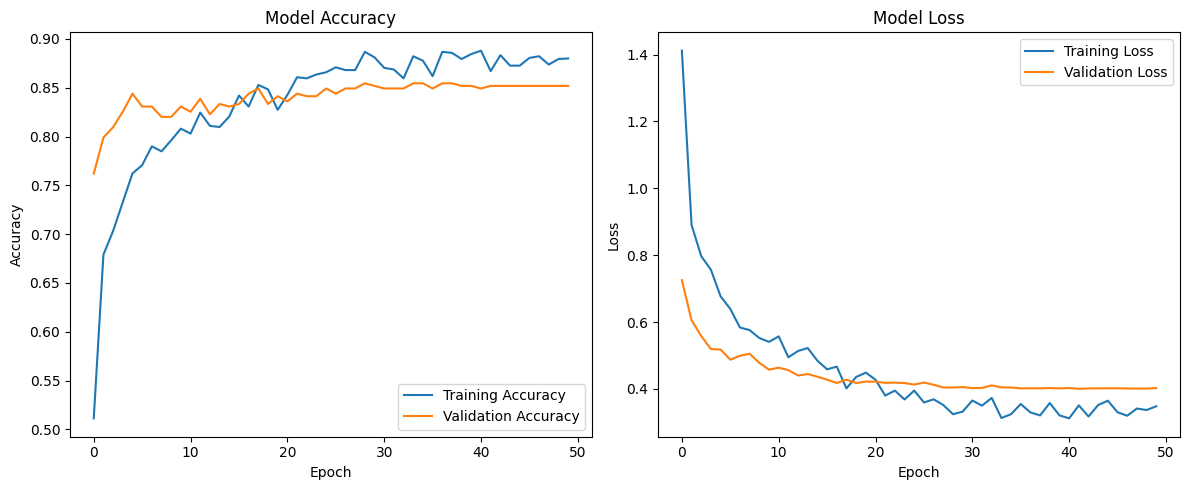

In [ ]:
print("\nTraining model with callbacks  . . . \n")
# Training the model with callbacks
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,           # Train for max 50 epochs (early stopping will prevent overfitting)
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("\nPlotting training history  . . .  ")
# Plotting training history
plt.figure(figsize=(12, 5))

print("Plotting training accuracy . . . ")
# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print("Plotting training loss . . . ")
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

print("Plotting graph . . . ")
# Displaying graph
plt.tight_layout()
plt.show()

### Cell 7 - Fine-tuning L.I.N.N

In [ ]:
# Unfreezing some layers of the base model for fine-tuning
print("Unfreezing some layers of the base model for fine-tuning  . . . ")
# Only unfreezing the top layers of the base model (Meaning keeping early layers frozen)
for layer in base_model.layers[-30:]:  # Unfreezing the last 30 layers
    layer.trainable = True


print("Recompiling model with a lower learning rate for fine-tuning  . . . ")
# Recompiling model with a lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lowering learning rate - LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


print("\nFine-tuning the model  . . . ")
# Fine-tuning the model
fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("Saving Fine-tuned Model  . . . ")
# Saving fine-tuned L.I.N.N model
model.save('/content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_waste_classification_finetuned.keras')

print("✅ Sucessfully Saved Model")

Unfreezing some layers of the base model for fine-tuning  . . . 
Recompiling model with a lower learning rate for fine-tuning  . . . 

Fine-tuning the model  . . . 
Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9316 - loss: 0.2063
Epoch 1: val_accuracy did not improve from 0.86243
56/56 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9315 - loss: 0.2064 - val_accuracy: 0.8439 - val_loss: 0.4588 - learning_rate: 1.0000e-04
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9116 - loss: 0.2236
Epoch 2: val_accuracy improved from 0.86243 to 0.87831, saving model to /content/drive/My Drive/Colab Notebooks/CAPSTONE/best_linn_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9116 - loss: 0.2239 - val_accuracy: 0.8783 - val_loss: 0.4266 - learning_rate: 1.0000e-04
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9170 - loss: 0.2224
Epoch 3: val_accuracy did not improve from 0.87831
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0

### Cell 8 - Build Model Evaluation


Getting class names  . . . 

Resetting the test data generator . . . 

Getting true lables . . . 

Predicting on test data . . . 


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step

Calculating test accuracy . . . 
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8717 - loss: 0.3557
Test Accuracy: 0.8773

Generating classification report . . . 

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.95      0.92      0.93        61
       glass       0.95      0.80      0.87        76
       metal       0.83      0.89      0.86        62
       paper       0.90      0.90      0.90        90
     plastic       0.84      0.89      0.87        73
       trash       0.67      0.86      0.75        21

    accuracy                           0.88       383
   macro avg       0.86      0.88      0.86       383
weighted avg       0.88      0.88      0.88       383


Generating confusion matrix . . . 


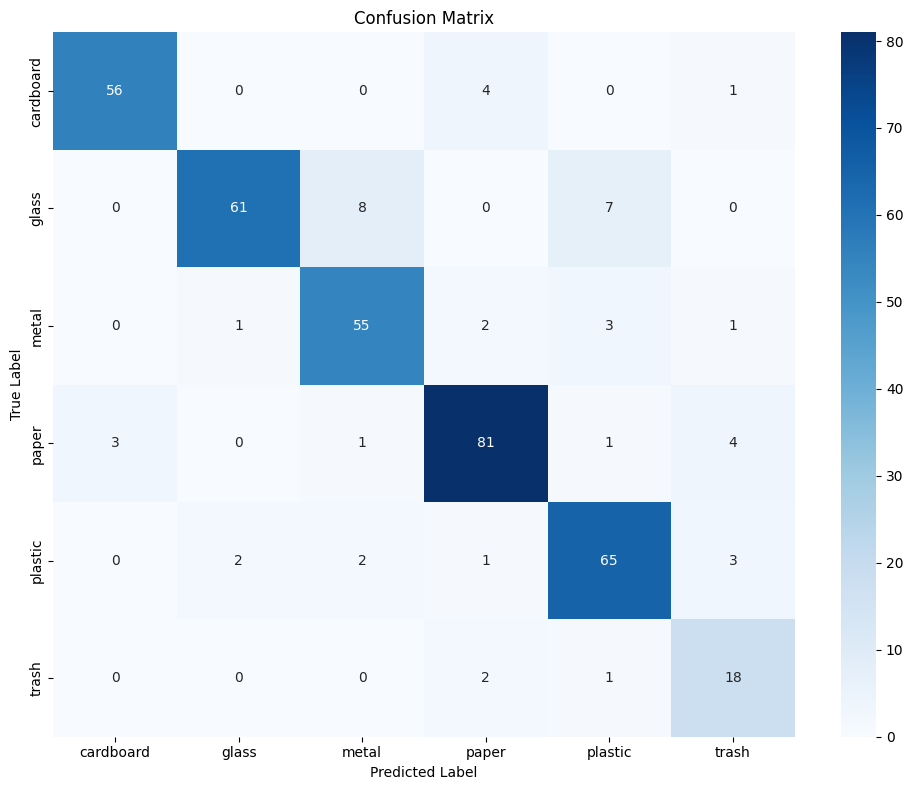


Calculating per-class accuracy . . . 
Accuracy for class 'cardboard': 0.9180
Accuracy for class 'glass': 0.8026
Accuracy for class 'metal': 0.8871
Accuracy for class 'paper': 0.9000
Accuracy for class 'plastic': 0.8904
Accuracy for class 'trash': 0.8571


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nGetting class names  . . . ")
# Getting class names
class_names = list(test_data.class_indices.keys())

print("\nResetting the test data generator . . . ")
# Resetting the test data generator to ensure we process all samples
test_data.reset()

print("\nGetting true lables . . . ")
# Getting the true labels
y_true = test_data.classes

print("\nPredicting on test data . . . ")
# Predictting on test data
y_pred_prob = model.predict(test_data)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nCalculating test accuracy . . . ")
# Calculating test accuracy
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

print("\nGenerating classification report . . . ")
# Printing classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nGenerating confusion matrix . . . ")
# Creating and plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nCalculating per-class accuracy . . . ")
# Calculating per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Accuracy for class '{class_names[i]}': {acc:.4f}")

### Cell 9 - Model Optimization for Edge Deployment - TFLite

In [ ]:
import tensorflow as tf

print("\nConverting model to TensorFlow Lite format . . . ")
# Function to create and save TFLite model
def convert_to_tflite(model, quantize=True, model_name="linn_ODAC_model"):
    # Creating TFLite converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    print("\nSetting optimization options . . . ")
    # Adding optimization if requested
    if quantize:
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        converter.target_spec.supported_types = [tf.float16]
        model_name += "_quantized"

    print("\nConverting model . . . ")
    # Converting model
    tflite_model = converter.convert()

    print("\nSaving model . . . ")
    # Saving model
    tflite_path = f'/content/drive/My Drive/Colab Notebooks/CAPSTONE/{model_name}.tflite'
    with open(tflite_path, 'wb') as f:
        f.write(tflite_model)

    print(f"Getting model size . . . ")
    # Getting model size
    model_size = len(tflite_model) / (1024 * 1024)  # Size in MB
    print(f"TFLite model saved to: {tflite_path}")
    print(f"Model size: {model_size:.2f} MB")

    return tflite_path

print("\nConverting to regular TFLite model . . . ")
# Converting to regular TFLite model
regular_tflite_path = convert_to_tflite(model, quantize=False, model_name="linn_waste_classifier")

print("\nConverting to quantized TFLite model . . . ")
# Converting to quantized TFLite model (smaller, faster)
quantized_tflite_path = convert_to_tflite(model, quantize=True, model_name="linn_waste_classifier")


Converting model to TensorFlow Lite format . . . 

Converting to regular TFLite model . . . 

Setting optimization options . . . 

Converting model . . . 
Saved artifact at '/tmp/tmpsghmm570'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  135689085788304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085788496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085792912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085792144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085790992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085792336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085791760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135689085789456: TensorSpec(shape=(), dtype=tf.resource, name=No

### Cell 10 - TFLite Model Testing

Starting function to test TFLite model performance . . . 
Testing regular TFLite model...
Loading TFLite model . . . 
Getting input and output details . . . 
Preparing variable for accuracy calculation . . . 
Resetting test data  . . . 
Processing 100 test images  . . . 
Getting batch from test data to start loop to get predictions
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 


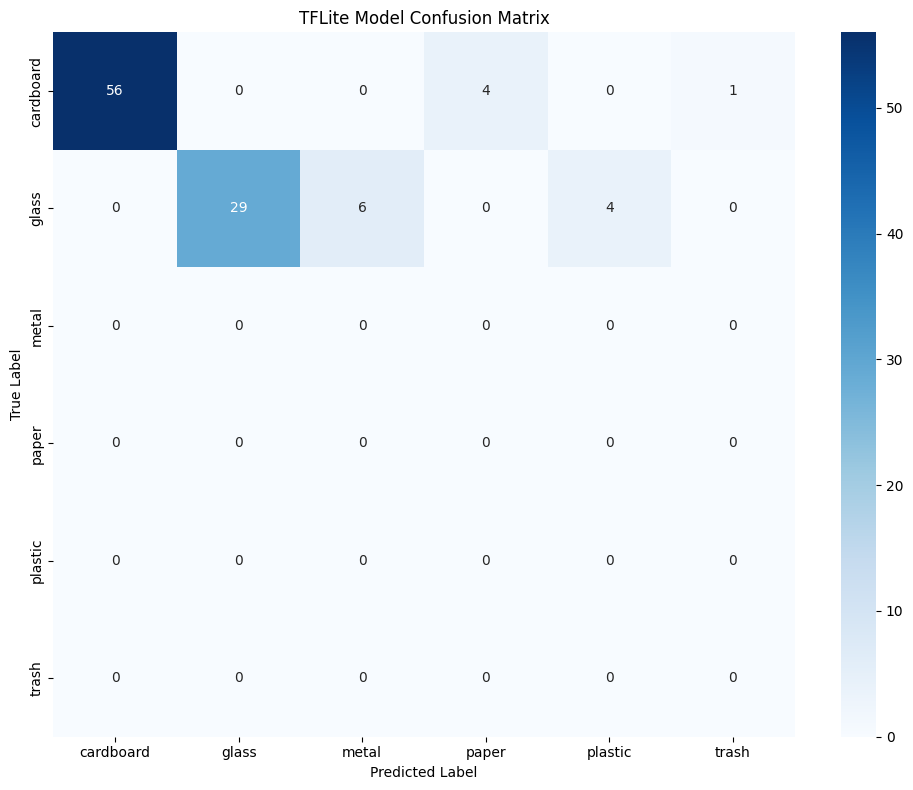


Testing quantized TFLite model...
Loading TFLite model . . . 
Getting input and output details . . . 
Preparing variable for accuracy calculation . . . 
Resetting test data  . . . 
Processing 100 test images  . . . 
Getting batch from test data to start loop to get predictions
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 
Getting single image and true label  . . . 
Preparing input . . . 
Setting input tensor  . . . 
Measuring interence time . . . 
Getting results  . . . 
Counting correct predictions  . . . 
Recording inference time  . . . 
Getting single image and true label  . . . 
Preparing i

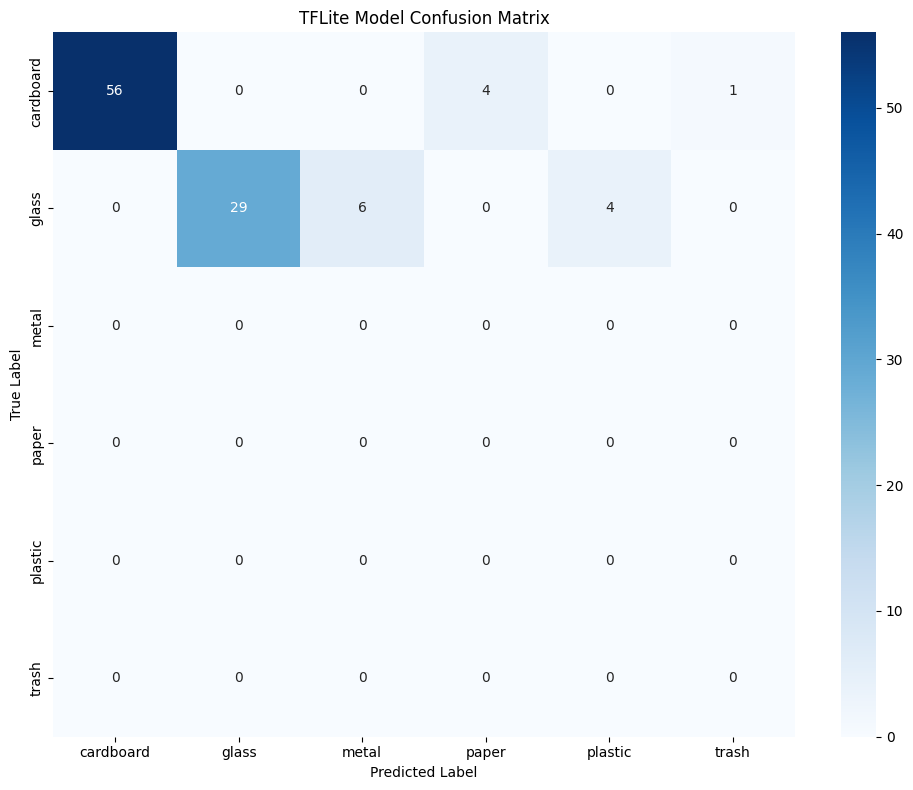

In [ ]:
import numpy as np
import time

print("Starting function to test TFLite model performance . . . ")
# Function to test TFLite model performance
def test_tflite_model(tflite_path, test_data, class_names):

    print("Loading TFLite model . . . ")
    # Loading TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_path)
    interpreter.allocate_tensors()

    print("Getting input and output details . . . ")
    # Getting input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    print("Preparing variable for accuracy calculation . . . ")
    # Preparing variables for accuracy calculation
    correct = 0
    total = 0
    inference_times = []

    print("Resetting test data  . . . ")
    # Resetting test data
    test_data.reset()

    print("Processing 100 test images  . . . ")
    # Processing 100 test images or fewer if test set is smaller
    max_test = min(100, test_data.samples)
    predictions = []
    true_labels = []

    print("Getting batch from test data to start loop to get predictions")
    # Getting batch from test data
    for i in range(max_test):
        if i % 32 == 0:  # Get new batch when needed
            x_batch, y_batch = next(test_data)
            batch_index = 0

        print("Getting single image and true label  . . . ")
        # Getting single image and true label
        img = x_batch[batch_index]
        true_label = np.argmax(y_batch[batch_index])
        true_labels.append(true_label)
        batch_index += 1

        print("Preparing input . . . ")
        # Preparing input
        input_data = np.expand_dims(img, axis=0).astype(np.float32)

        print("Setting input tensor  . . . ")
        # Set inputting tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        print("Measuring interence time . . . ")
        # Measuring inference time
        start_time = time.time()
        # Running inference
        interpreter.invoke()
        end_time = time.time()

        print("Getting results  . . . ")
        # Getting results
        output_data = interpreter.get_tensor(output_details[0]['index'])
        pred_label = np.argmax(output_data)
        predictions.append(pred_label)

        print("Counting correct predictions  . . . ")
        # Counting correct predictions
        if pred_label == true_label:
            correct += 1
        total += 1

        print("Recording inference time  . . . ")
        # Recording inference time
        inference_times.append(end_time - start_time)

    print("Calculating metrics  . . . ")
    # Calculating metrics
    accuracy = correct / total
    avg_inference_time = sum(inference_times) / len(inference_times)
    fps = 1.0 / avg_inference_time

    print("Results")
    # Printing results
    print(f"\nTFLite Model: {tflite_path}")
    print(f"Accuracy on {total} test images: {accuracy:.4f}")
    print(f"Average inference time: {avg_inference_time*1000:.2f} ms")
    print(f"Estimated FPS: {fps:.2f}")

    print("Generating confusion matrix  . . . ")
    # Creating confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('TFLite Model Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()



# Testing both models

print("Testing regular TFLite model...")
test_tflite_model(regular_tflite_path, test_data, class_names)

print("\nTesting quantized TFLite model...")
test_tflite_model(quantized_tflite_path, test_data, class_names)

### Cell 11  - Creating Sample Inference Code for Raspberry Pi
##### This code will run on RaspberryPi and access the model for intended purpose

In [ ]:

print("Creating Sample Inference Code for Raspberry Pi . . . ")
# Generating a Python script for Raspberry Pi deployment
raspberry_pi_code = '''
import time
import numpy as np
import tflite_runtime.interpreter as tflite
from PIL import Image
import cv2
import os

class LINNWasteClassifier:
    def __init__(self, model_path, labels_path=None, camera_id=0):
        # Load TFLite model
        self.interpreter = tflite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()

        # Get model details
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()
        self.input_shape = self.input_details[0]['shape'][1:3]  # Height, width

        # Load class labels
        if labels_path and os.path.exists(labels_path):
            with open(labels_path, 'r') as f:
                self.labels = [line.strip() for line in f.readlines()]
        else:
            # Default labels for waste classification
            self.labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

        # Initialize camera
        self.camera_id = camera_id
        self.cap = None

    def preprocess_image(self, image):
        """Preprocess image for model input"""
        # Resize to model input size
        img = cv2.resize(image, (self.input_shape[1], self.input_shape[0]))

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize pixel values to [0,1]
        img = img.astype(np.float32) / 255.0

        # Add batch dimension
        img = np.expand_dims(img, axis=0)

        return img

    def classify_image(self, image):
        """Classify a single image"""
        # Preprocess image
        processed_img = self.preprocess_image(image)

        # Set input tensor
        self.interpreter.set_tensor(self.input_details[0]['index'], processed_img)

        # Run inference
        start_time = time.time()
        self.interpreter.invoke()
        inference_time = time.time() - start_time

        # Get output tensor
        output = self.interpreter.get_tensor(self.output_details[0]['index'])

        # Get prediction
        prediction_idx = np.argmax(output[0])
        confidence = output[0][prediction_idx]
        label = self.labels[prediction_idx]

        return {
            'label': label,
            'confidence': float(confidence),
            'inference_time_ms': inference_time * 1000,
            'class_probabilities': {self.labels[i]: float(output[0][i]) for i in range(len(self.labels))}
        }

    def start_camera(self):
        """Initialize camera"""
        self.cap = cv2.VideoCapture(self.camera_id)
        if not self.cap.isOpened():
            raise RuntimeError(f"Failed to open camera {self.camera_id}")

    def classify_from_camera(self, continuous=False, display=True):
        """Classify waste from camera feed"""
        if self.cap is None:
            self.start_camera()

        try:
            frame_count = 0
            start_time = time.time()

            while True:
                ret, frame = self.cap.read()
                if not ret:
                    print("Failed to grab frame")
                    break

                # Process frame
                result = self.classify_image(frame)
                frame_count += 1

                # Display results on frame
                if display:
                    # Add prediction text and confidence
                    label_text = f"{result['label']} ({result['confidence']:.2f})"
                    cv2.putText(frame, label_text, (10, 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

                    # Add FPS info
                    fps = frame_count / (time.time() - start_time)
                    cv2.putText(frame, f"FPS: {fps:.1f}", (10, 60),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

                    # Show image
                    cv2.imshow('L.I.N.N. Waste Classification', frame)

                # Break loop on 'q' key
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                # If not continuous mode, break after one frame
                if not continuous:
                    break

            # Calculate overall FPS
            total_time = time.time() - start_time
            avg_fps = frame_count / total_time if total_time > 0 else 0
            return avg_fps

        finally:
            if not continuous:
                self.release_camera()

    def release_camera(self):
        """Release camera resources"""
        if self.cap is not None:
            self.cap.release()
            cv2.destroyAllWindows()
            self.cap = None

    def classify_file(self, image_path):
        """Classify an image file"""
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Failed to load image: {image_path}")
        return self.classify_image(img)

    def __del__(self):
        """Cleanup resources"""
        self.release_camera()

# Example usage
if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser(description='L.I.N.N. Waste Classification')
    parser.add_argument('--model', type=str, default='linn_waste_classifier_quantized.tflite',
                        help='Path to TFLite model')
    parser.add_argument('--labels', type=str, default=None,
                        help='Path to labels file (optional)')
    parser.add_argument('--camera', type=int, default=0,
                        help='Camera device ID')
    parser.add_argument('--mode', type=str, choices=['camera', 'file'], default='camera',
                        help='Run mode: camera or file')
    parser.add_argument('--continuous', action='store_true',
                        help='Continuous classification from camera')
    parser.add_argument('--image', type=str, default=None,
                        help='Path to image file (for file mode)')

    args = parser.parse_args()

    # Create classifier
    classifier = LINNWasteClassifier(args.model, args.labels, args.camera)

    if args.mode == 'camera':
        print("Starting camera classification. Press 'q' to quit.")
        avg_fps = classifier.classify_from_camera(continuous=args.continuous)
        if not args.continuous:
            print(f"Average FPS: {avg_fps:.2f}")

    elif args.mode == 'file' and args.image:
        try:
            result = classifier.classify_file(args.image)
            print(f"Classification result: {result['label']}")
            print(f"Confidence: {result['confidence']:.4f}")
            print(f"Inference time: {result['inference_time_ms']:.2f} ms")
            print("Class probabilities:")
            for class_name, prob in result['class_probabilities'].items():
                print(f"  {class_name}: {prob:.4f}")
        except Exception as e:
            print(f"Error: {str(e)}")
'''

# Saving the Raspberry Pi code to ColabDrive
with open('/content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi.py', 'w') as f:
    f.write(raspberry_pi_code)

print("\n✅ Raspberry Pi deployment code has been saved to: /content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi.py")

Creating Sample Inference Code for Raspberry Pi . . . 

✅ Raspberry Pi deployment code has been saved to: /content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi.py


### Cell 12 - Creating Installation Guide for RaspberryPi

In [ ]:

print("Creating Installation Guide for Raspberry Pi . . . ")
# Creating an installation guide for Raspberry Pi
raspberry_pi_guide = '''# L.I.N.N. - Waste Classification on Raspberry Pi
## Installation and Setup Guide

This guide will help you set up the L.I.N.N. (Lite Intelligent Neural Network) waste classification system on your Raspberry Pi.

### Prerequisites
- Raspberry Pi 3 or newer (Pi 4 recommended)
- Raspberry Pi Camera or USB webcam
- Raspbian OS (Buster or newer)

### Step 1: Basic Setup
```bash
# Update your system
sudo apt update
sudo apt upgrade -y

# Install dependencies
sudo apt install -y python3-pip python3-opencv libatlas-base-dev

### Step 2: Install TensorFlow Lite Runtime
# Install TensorFlow Lite runtime
pip3 install tflite-runtime
pip3 install numpy pillow

### Step 3: Copy Required Files
# Copy these files from your development machine to the Raspberry Pi:
# `linn_waste_classifier_quantized.tflite` - The quantized model
# `linn_raspberry_pi.py` - The Python script

### Step 4: Run the Model
# 1. For camera-based classification : For continuous classification from camera
     # python3 linn_raspberry_pi.py --model linn_waste_classifier_quantized.tflite --continuous
# 2. For single-frame classification
     # python3 linn_raspberry_pi.py --model linn_waste_classifier_quantized.tflite
# 3. For classifying an image file:
     # python3 linn_raspberry_pi.py --mode file --image /path/to/your/image.jpg --model linn_waste_classifier_quantized.tflite


-----------------------------

# ### Troubleshooting
# # Low FPS
# If you experience low frames per second:

# Try the quantized model which is optimized for speed
# Lower the resolution in the camera settings
# Make sure your Raspberry Pi is properly cooled to prevent thermal throttling

# # Camera Not Found
# If the camera is not detected:

# For Pi Camera: Make sure it's enabled in raspi-config
# For USB cameras: Try different device IDs with the --camera parameter

# # Memory Errors
# If you encounter memory errors:

# Close other applications running on the Pi
# Make sure you're using the quantized model
# Consider overclocking your Pi (with proper cooling)

# # Performance Optimization Tips

# Overclocking: If you're using a Raspberry Pi 4 with good cooling, you can overclock it for better performance.
# Resolution: Working with smaller input images (like 224x224) is faster.
# Background Services: Disable unnecessary services on your Pi.
# Power Supply: Ensure your Pi has a good power supply (3A recommended for Pi 4).

# # Extending the Project

# Add a web interface to view results remotely
# Connect to a sorting mechanism for automated waste sorting
# Implement data logging for environmental research
# Build a mobile application to communicate with your Pi

'''

# Saving Raspberry Pi Setup and Installation Guide to ColabDrive
with open('/content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi_guide.md', 'w') as f:
  f.write(raspberry_pi_guide)

print("\n✅ Raspberry Pi installation guide has been saved to: /content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi_guide.md")

# with open('/content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi_guide.py', 'w') as f:
#     f.write(raspberry_pi_guide)

# print("✅ Raspberry Pi deployment code has been saved to: /content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi_guide.md")

Creating Installation Guide for Raspberry Pi . . . 

✅ Raspberry Pi installation guide has been saved to: /content/drive/My Drive/Colab Notebooks/CAPSTONE/linn_raspberry_pi_guide.md


In [ ]:
# These code cells provide a complete workflow for:
# 1. Data preparation with enhanced augmentation
# 2. Building a more efficient CNN using MobileNetV2 for transfer learning
# 3. Advanced training with callbacks for optimal performance
# 4. Fine-tuning for better accuracy
# 5. Model optimization for edge deployment
# 6. Comprehensive evaluation
# 7. Raspberry Pi deployment code and installation guide

# Code is to be run sequentially. The improved architecture and training approach should significantly boost your model's accuracy while ensuring it's optimized for edge deployment on Raspberry Pi.

# HISTORY COMMENTED - APRIL 13TH - UNNEEDED CODE ⬇️

In [ ]:
# # Building the Convolutional Neural Network (CNN)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Define CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2,2),

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),

#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(2,2),

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(6, activation='softmax')  # 6 classes: cardboard, plastic, paper, metal, glass, trash
# ])
# # Conv2D detects patterns like edges, curves, or textures.
# # (3,3) sets a 3x3 filter window to scan the image.
# # 32 filters detect different features (plastic textures vs. metal shine).
# # ReLU replaces negative outputs with 0 — keeps learning fast and efficient.
# # input_shape=(150, 150, 3) tells the model it’s getting 150x150 images with 3 color channels (RGB).

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Model summary
# model.summary()


In [ ]:
# # Training the Model for ten(10) epochs

# history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)


In [ ]:
# # Evaluating the Test Set to show how well the model performs on unseen data.
# test_loss, test_acc = model.evaluate(test_data)
# print(f"Test Accuracy: {test_acc:.2f}")


In [ ]:
# # Saving the model
# # model.save("/content/drive/My Drive/Colab Notebooks/CAPSTONE/waste_classification_model.h5")
# model.save("/content/drive/My Drive/Colab Notebooks/CAPSTONE/waste_classification_model.keras")


In [ ]:
# # # Loading the model
# # from tensorflow.keras.models import load_model
# # model = load_model("/content/drive/My Drive/Colab Notebooks/CAPSTONE/waste_classification_model.h5")


# from tensorflow.keras.models import load_model

# # Load model and ensure it's compiled
# model = load_model("/content/drive/My Drive/Colab Notebooks/CAPSTONE/waste_classification_model.keras")

# # Recompile to restore metrics
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
